<a href="https://colab.research.google.com/github/Carol-ACDR/Metodos-Numericos/blob/main/Mod_Top_NMF_SVD(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

### <center> __Modelagem de Tópicos com NMF e SVD__</center>

##### <center> Dezembro de 2022 </center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Modelagem de Tópicos é uma forma de mineração de texto, uma forma de identificar padrões e conjuntos. Uma da maneira de fazer uma modelagem de tópico é construindo um conjunto e executando-o utilizando algumas ferramentas capazes de gerar e analisar grupos de palavras, distribuindo assim em tópicos. Ela também pode ajuda na explorar grandes quantidades de dados de texto, encontrando grupos de palavras, similaridade entre documentos e descobrir tópicos abstratos. Alguns dos métodos mais conhecidos para modelagem de tópicos são o SVD e o NMF, na qual se utilizam de matrizes para a obtenção de seus resultados. Vamos detalhar cada um dos métodos.

### SVD:

O SVD (Singular Value Decomposition, ou do português Decomposição em Valores Singulares) é a fatoração de uma matriz, podendo essa ser real ou complexa, reduzindo assim às suas partes constituintes, com finalidade de simplificar certos cálculos subsequentes da matriz. Esse método é bastante utilizado em processamento de sinais e analise estatístico. Uma de suas aplicações é o agrupamento de artigos por tópico.

O SVD é dado por uma matriz de entrada A, por exemplo, do tipo mxn na qual é fatorada da seguinte forma:
<center> A<sub>mxn</sub> = U<sub>mxm</sub>• ∑<sub>mxn</sub>• V*<sub>nxn</sub> </center>

Onde cada termo é descrito como:
- U ~> é uma matriz unitaria mxm;
- ∑ ~> é uma matriz diagonal mxn;
- V* ou V<sup>T </sup> ~> é uma matriz unitária conjugada nxn.

São essas três matrizes que compõem a matriz SVD podem ser complexas ou reais.


<img src="https://blog.kakaocdn.net/dn/bsLJ5A/btqBZqJMY8P/dvxOlSuKMEg1OPgZXde7u1/img.png" alt="Fatoração da matriz SVD" style="height:300px">
<br>
<center> Fonte: <a href="https://blog.kakaocdn.net/dn/bsLJ5A/btqBZqJMY8P/dvxOlSuKMEg1OPgZXde7u1/img.png">https://blog.kakaocdn.net/dn/bsLJ5A/btqBZqJMY8P/dvxOlSuKMEg1OPgZXde7u1/img.png</a> <center>

### NMF

O NMF (Non-negative Matrix Factorization, ou do português Fatoração de Matriz Não negativa) é um conjunto de algoritmos baseado em análise multivariadas e ágebra linear, na qual é representado por uma matriz mxn que é fatorada em outras duas matrizes, uma das principais propriedade é a não existencia de números negativos, o que se torna mais fácil de inspecionar à matriz resultante. É possível encontrar sua aplicação em espectrogramas de áudio, por exemplo. Como não se trabalha com números negativos, o problema não é totalmente solucionado, dessa forma, tem-se uma oproximação do que seria a matriz resultante real.

Sua aplicação pode ser encontrada nas mais diversas áreas, como no processamento de audio, processamento de imagens, agrupamento de documentos e bioinfórmatica.

O NMF é definido por uma cobinação linear do tipo:

<center> A<sub>mxn</sub> ≈ W<sub>mxk</sub> • H<sub>kxn</sub> </center>

Onde cada termo é descrito como:

- A ~> matriz de entrada;
- W ~> matriz de recursos;
- H ~> matriz de coeficientes;
- k ~> aproximação de classificação baixa de A, ou seja o menor valor aproximado entre m e n da matriz A (k ≤ min(m,n)).


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210429213042/Intuition1-660x298.png" alt="Fatoração da matriz NMF" style="height:200px">
<br>
<center> Fonte: <a href="https://media.geeksforgeeks.org/wp-content/uploads/20210429213042/Intuition1-660x298.png">https://media.geeksforgeeks.org/wp-content/uploads/20210429213042/Intuition1-660x298.png</a> <center>

### As principais diferenças entre SVD e NMF:

SVD é uma técnica de fatoração de matriz exata, ou seja você pode reconstruir a matriz de entrada a partir das matrizes resultantes. Enquanto na NMF você não consegue esse recostrução. Por outro lado, o NMF é conhecido por capturar tópicos mais diversos do que o SVD. Se você optar por usar k-SVD, é a melhor aproximação de classificação k possível para a matriz de entrada. Ou seja, quanto maior for o conjunto de valores singular (k), maior será a precisão da modelagem.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Nosso problema consiste em pegar um conjunto de dados de documentos (textos) com várias categorias diferentes e encontrar tópicos ou grupos de palavras para eles.

No problema teremos um conjunto de dados descritos em um período t de tempo. Como no exemplo base que possui 18.000 postagens de grupos de notícias com 20 tópicos referentes as decadas de 80 e 90. No problema temos um período t de tempo pelo fato de estarmos trabalhando com datasets, que são conjuntos de dados menores quando comparadas com databases. O fato de escolher um dataset é que o nível de escalabilidade é menor, logo o nível de complexibilidade para a analise também é menor e mais harmonizada.

Inicialmente temos que alimentar a nossa rede neural, separando um conjunto de teste e um conjunto de trinamento, é necessario ter esses dois conjuntos para salientar que a nossa rede neural esteja funcionando corretamente, ou seja, consiga identificar realmente. Caso os conjuto de trainamento e teste fosse os mesmos, não conseguiriamos ter uma precisão do erro, já que o rede já conheceria os dados de teste.

Para isso, é preciso utilizar métodos que a pliquem a modelagem de tópicos, pois, como dito acima, o nosso objetivo é subtividir o nosso conjunto em tópicos, nos quais cada tópico irá agrupar documentos que tenham padrões semelhantes.

Esse é um classico problema de classificação, e ele pode se encaixar nas mais diversas aplicabilidade, podemos ter classificação de médicamentos, de espécies de animais/flores, de sinais, de documentos/texto, que é o que vamos utilizar, entre diversas outras aplicações.

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Como vimos na introtução, tanto o método SVD quanto o NMF podem ser utilizados para a separação e identificação de padrões, então faremos uso deles para as nossas aplicação. Faremos o mesmo problema sendo aplicado nos dois métodos. Com o objetivo de obtemos a modelagem de tópicos por duas visões diferentes.

Optamos por escolher esses métodos pelo fato de que no NMF tem como objetivo a redução de dimensionalidade e extração de características. Além dele ser usado nas principais aplicações, como processamento de imagem, mineração de texto, análise de dados espectrais, astronomia, imputação de dados, previsão de distância da internet escalável, eleminação de ruídos em sinais, genética de população, bioinformática, imagem nuclear e diversas outras aplicações. Na astronomia, por exemplo, é utilizado para a redução de dimensão, já que os sinais astrofísicos são não negatimos, além de poder ser realizado um processo linaer, que é bastante utilizado para separa a luz estelar e a luz espalhada. Outro destaque é para a sua aplicação na mineração de texto, cujo é o objetivo de sua utilização nesse artigo, é dada por uma matriz que podemos chamar como sendo de documento-termo na qual é construída de pesos de varios termos. Essa matriz pode ser fatorada em duas matrizes, sendo elas a de característica-documento e a feição-documento. Assim o algoritmo reduz a matriz termo-documento em uma matriz menor e mais adequada para agrupamento de texto.

O método SVD por sua vez também possui diversas aplicações como na solução de sistemas linear homogêneos, para o cálculo de pseudo-inversa, minimização de mínimos quadros totais, aproximação por matriz de baixo posto, modelo separáveis, matris ortogonal mais próxima, até o algoritmo de Kabsch utiliza o SVD para calcular a rotação ótima, e esse algoritmo é bastante utilizado em visão computacional, robótica e até mesmo na comparação de estruturas moleculares. Esse método também é abordado na mineração de texto por permitir a redução de dimenções ajudando assim na classificação de tópicos. Essas são algumas das diversas aplicações. O método consiste basicamente em uma fatoração de duas matrizes ortagonais e uma matriz diagonal, na qual são responsavel por subdividir o nosso espectro de texto, por exemplo, permitindo uma analise topicamente. E um de seus distaques é a possibilidade de retornar da fatoração para a matriz original de entrada.

Como podemos observar ambos são utilizados na mineração de textos, pois um dos principais motivo é a redução de dimenções e permitir a topicalização das palavras. Que é o objetivo do nosso problema, isso já é um motivo plausível de suas utilizações.

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO/CASOS DE USO
</div>

Nesse tópico iremos realizar a implementação já fazendo a aplicação em dois casos de uso. Sendo um deles o caso do exemplo base e o outro é de um dataset sobre fake new, que será descrito na hora certa.

Importando as bibliotecas base para analise:

In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

Primeiro vamos importar nossa dataset para analise. Nessa primeira analise é o exemplo dado no texto base. No qual esse dataset é um conjunto de notícias sobre grupos de discussão na Usenet, que era popular nos anos 80 e 90. Este conjunto de dados inclui 18.000 postagens de grupos de notícias com 20 tópicos.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Faremos um breve tratamento dos dados, definindo as categorias, o que desejamos remover dessas notícias, além de separar os dados de trainamento e teste da nossa rede neural.

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

Vamos encontar o formato que estamos trabalhando, para isso vamos usar o shape:

In [ ]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

Agora vamos usar o scikit learn para extrair todas as contagens de palavras para nós.

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

Agora vamos formatar o vertor de entrada que será utilizado para na fatoração do SVD.

In [ ]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

Criando a matriz de vocabulario.

In [ ]:
vocab = np.array(vectorizer.get_feature_names_out())

Agora vamos usar o svd da biblioteca scipy.linalg para obtermos as matrizes unitaria, diagonal e unitaria transposta.

In [ ]:
U, S, V_T = svd(vectors, full_matrices=False)
U, S, V_T

(array([[-4.77990794e-03, -2.71987875e-03,  1.21235561e-03, ...,
         -7.17460933e-18, -4.41077075e-18, -3.34280611e-18],
        [-2.21299669e-04,  1.74990511e-04,  1.07815079e-03, ...,
          1.55587150e-16,  1.24516051e-16, -9.93194897e-17],
        [-6.36934010e-04,  7.42290500e-04,  8.31832870e-04, ...,
         -2.75828522e-16, -6.39534154e-17,  5.46135949e-17],
        ...,
        [-1.38527330e-03,  7.35183579e-04,  2.33163116e-04, ...,
          1.36441761e-16, -6.47499090e-16, -1.67038285e-16],
        [-2.17182920e-03, -6.80947315e-04,  9.56544786e-03, ...,
          9.72630993e-17,  6.85757874e-17, -2.64274280e-18],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([4.33926985e+02, 2.91510127e+02, 2.40711377e+02, ...,
        2.69231414e-14, 1.90845796e-14, 1.40361590e-14]),
 array([[-9.40971949e-03, -1.14531979e-02, -2.16949925e-05, ...,
         -5.71798766e-06, -1.14359753e-05, -1

Vamos verificar as formas da matrizes resultante da vatoração dos SVD.

In [ ]:
U.shape, S.shape, V_T.shape

((2034, 2034), (2034,), (2034, 26576))

Um dos principios do SVD é que ele permite que a partir das matriz gerada na fatoração a gente possa voltar a matriz de entrada, nesse forma vamos fazer uma função para averificação de tal caso.

In [ ]:
# recebe como atributos a matris unitaria, sua transposta e a matriz diagonal.
def recostruicao_matriz_entrada(u, s, vt):
    # primeiro vamos trnasformar s em um matriz diagonal, para isso vamos utilizar a função diag na biblioteca numpy
    sigma = np.diag(S)

    r_vectors = u @ sigma @ vt

    return r_vectors

In [ ]:
r_v = recostruicao_matriz_entrada(U, S, V_T)

Usaremos a função allclose da biblioteca numpy para verificar se realmente a matriz que foi reconstruida é igual a original. Usaremos a função numpy.allclose() para verificar se os dois arrays são iguais ou não, pelo fato dessa função retorna True se todos os elementos dentro de ambas as matrizes forem iguais dentro de uma tolerância especificada.

In [ ]:
np.allclose(r_v, vectors)

True

Então como visto anteriomente, provamos que relamente é possivel reconstruir a matriz de entrada a partir da matrizes resultate da fatoração. Agora temos que provar se realmente a matriz unitaria e a matriz unitaria transposta são ortagonais.

In [ ]:
np.allclose(U.T @ U, np.eye(U.shape[0]))

True

In [ ]:
np.allclose(V_T @ V_T.T, np.eye(V_T.shape[0]))

True

Iremos apresentar gráficamente os valores sigulares

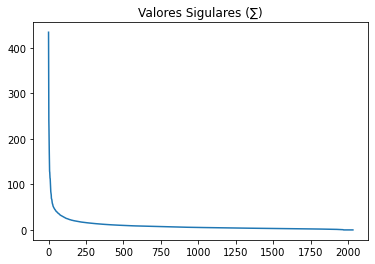

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S)

Pesebemos que tem um cotovelo proximo do 250, vamos diminuir a escala para um valor menor que esse, para podemos analisar melhor.

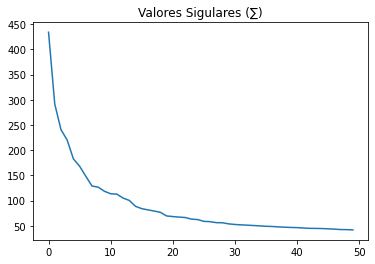

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S[:50])

Agora foi possivel ver a variação melhor, se diminimuimos mais, será mais fácil analisar a onda de variação.

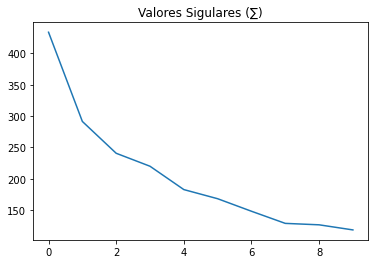

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S[:10])

Agora temos uma representação melhor, com isso vamos utilizar esse trecho para apresentar os tópicos dessa variação. Para isso será necessário criar uma função, na qual irá reber a matriz diagonal (valores singulares), o numero de tópicos e a matriz de vocabularios que criamos anteriomente.

In [ ]:
def show_topics(a, num, matriz):
    top_words = lambda t: [matriz[i] for i in np.argsort(t)[:-num-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

Agora vamos utilizar essa função que criamos para obtemos os tópicos que correspondem aos tipos de clusters que esperaríamos buscando. Isso ocorre apesar do fato de ser um algoritmo não supervisionado, ou seja, nunca dissemos ao algoritmo como nossos documentos são agrupados.

In [ ]:
show_topics(V_T[:10], 8, vocab)

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'edu graphics data space pub mail 128 3d',
 'space jesus launch god people satellite matthew atheists',
 'space launch satellite commercial nasa satellites market year',
 'jpeg graphics space pub edu ray mail send',
 'jesus matthew prophecy messiah psalm isaiah david said',
 'launch commercial satellite market image services satellites launches',
 'data available nasa ftp grass anonymous contact gov',
 'atheists god religious atheism religion believe belief atheist',
 'probe data surface moon mars probes lunar launch']

Agora iremos utilizar o NMF para fazemos nossas analizes.

Inicialmente vamos pegar o número de linhas e colunas da nossa matriz de entra e armazenar em variaveis auxiliar (m e n), além de definimos a quantidade de tópicos que queremos analisar.

In [ ]:
m, n = vectors.shape
num_top = 6

Vamos fazer a fatoração de entrada na matriz de recursos e na matriz de coeficientes. Para isso vamos utilizar a função NMF da biblioteca sklearn.decomposition. Para garantir a integridade, iremos carregar os dados da nossa matriz de entrada novamente.

In [ ]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()

In [ ]:
m_nmf = NMF(n_components=num_top, random_state=1)

W = m_nmf.fit_transform(np.asarray(vectors))
H = m_nmf.components_

C:\Users\aliss\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [ ]:
show_topics(H, 8, vocab)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus matthew prophecy people said messiah david isaiah',
 'image data available software processing ftp edu analysis',
 'god atheists atheism religious believe people religion does']

Podemos analisar que em ambos os métodos chegamos em conjuntos que se assemelham. Mas para a nossa analise da NMF ficar completa, vamos fazer uma analise em TF-IDF que é uma maneira de normalizar a contagem de termos levando em consideração a frequência com que elas aparecem no documento, o tamanho do documento e o quão comum/raro é o termo.

Para isso teremos que calcular o TF e o IDF. O TF é dado pelo quociente resultante do número de ocorrência pelo número todal palavras. Enquanto o DF é dado pelo log do número de documentos dividido pelo número documentos com termo t nele.

Iremos recarregar os dados em novas variaveis para não perdemos os valores calculados anteriormente e depois de recalcular a NMF, iremos plotar o gráfico da TF-IDF.

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [ ]:
W1 = m_nmf.fit_transform(vectors_tfidf)
H1 = m_nmf.components_

C:\Users\aliss\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Para provar que estamos utilizando o mesmo resultado da NMF, vamos apresentar a matriz de coeficiente.

In [ ]:
show_topics(H1, 8, vocab)

['don people just think like know say religion',
 'thanks graphics files image file program windows format',
 'space nasa launch shuttle orbit lunar moon earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe atheism christian does belief',
 'objective morality values moral subjective science absolute claim']

Agora para fechar a analise iremos plotar o gráfico da TF-IDF e obter a aproximação do erro, pois como vimos na introdução o método NMF resulta em um valor aploximado, pelo fato da eleminação dos números negativos.

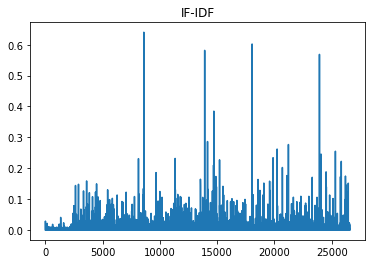

In [ ]:
plt.title("IF-IDF")
plt.plot(m_nmf.components_[0])

In [ ]:
m_nmf.reconstruction_err_

43.645567658711265

<hr>

Agora vamos aplicar os mesmo processo em um outro exemplo, para fixar o conhecimento.

Para a segunda analise iremos utilizar um dataset da <a href="https://www.kaggle.com/dataset">Kaggle</a>, vamos trabalhar com um conjunto de artigos de notícias (AG-News).

Sobre o conjunto temos a seguinte descrição: é um grande conjunto de dados que consiste em um conjunto de treinamento de 10.000 exemplos e um conjunto de teste de 5.000 exemplos. Os exemplos são divididos igualmente em duas classes: positivos e negativos. Isso torna o conjunto de dados adequado para pesquisa em métodos de classificação de texto. Que é o objetivo desse artigo.

Esse dataset possui os seguintes contente:

- text	~> O texto da notícia. (fragmento)
- label ~>	O rótulo do artigo de notícias. (inteiro)

Iremis analisar a coluna text, que o tipo de dado é texto, assim realizando uma analise parecida com a feita anteriomente.

Para ter acesso ao dataset e mais informações sobre o dados é só acessar <a href="https://www.kaggle.com/datasets/thedevastator/new-dataset-for-text-classification-ag-news">aqui</a>.

Fizemos o download do dataset de teste e iremos fazer a leitura e tratamento.

In [ ]:
# instanciando o modelo
df = pd.read_csv("C:/Users/aliss/Downloads/test.csv/test.csv")

Vamos apresentar o começo do dataframe para observamos o tipo de dado estamos lidando.

In [ ]:
df

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3
...,...,...
7595,Around the world Ukrainian presidential candid...,0
7596,Void is filled with Clement With the supply of...,1
7597,Martinez leaves bitter Like Roger Clemens did ...,1
7598,5 of arthritis patients in Singapore take Bext...,2


Vamos separar apenas a colunas que vamos trabalhar, que no caso é text.

In [ ]:
texto = df['text']
texto

0       Fears for T N pension after talks Unions repre...
1       The Race is On: Second Private Team Sets Launc...
2       Ky. Company Wins Grant to Study Peptides (AP) ...
3       Prediction Unit Helps Forecast Wildfires (AP) ...
4       Calif. Aims to Limit Farm-Related Smog (AP) AP...
                              ...                        
7595    Around the world Ukrainian presidential candid...
7596    Void is filled with Clement With the supply of...
7597    Martinez leaves bitter Like Roger Clemens did ...
7598    5 of arthritis patients in Singapore take Bext...
7599    EBay gets into rentals EBay plans to buy the a...
Name: text, Length: 7600, dtype: object

Vamos olhar a forma dos nossos dados.

In [ ]:
texto.shape

(7600,)

Faremos algumas funções anônimas que extraem alguns padrões como caracteres alphanuméricos, pontuações e espaços a mais. E aplicaremos no nosso conjunto de dados.

In [ ]:
# bibliotecas para manipulação de dados
import re
import string

# remover caracteres alphanuméricos
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)

# remover pontuações
punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)

# remover espaços duplos
remove_space = lambda x: x.replace('  ', ' ')

# aplicando as funções
texto = (texto.map(alphanumeric).map(punc).map(remove_space))

Agora que os nossos dados foram preprocessados, vamos começar a preparalo para analise. Para isso fizemos a contagem das palavras e montamos a nossa matriz de entrada.

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(texto).todense()
vectors.shape

(7600, 20791)

Iremos montar a nossa matriz de vocabularioa e visualizar o seu formato e algumas palavras que ele compoe.

In [ ]:
vocab = np.asarray(vectorizer.get_feature_names())
vocab.shape

C:\Users\aliss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(20791,)

In [ ]:
vocab[7000:7200]

array(['foa', 'foaf', 'foafkey', 'focus', 'focused', 'focuses',
       'focusing', 'foe', 'foen', 'foes', 'fog', 'foggia', 'foi', 'foie',
       'foil', 'foiled', 'foils', 'fold', 'folded', 'folders', 'foley',
       'folgers', 'folks', 'follow', 'followed', 'followers', 'following',
       'follows', 'fon', 'fond', 'font', 'fonterra', 'fonterras', 'food',
       'foodland', 'foods', 'fool', 'fooling', 'foolish', 'foot',
       'footage', 'football', 'footballer', 'footballers', 'foothold',
       'footing', 'footnote', 'footprint', 'footrace', 'footsteps',
       'footwear', 'foraging', 'foray', 'forbes', 'force', 'forced',
       'forcefully', 'forces', 'forcibly', 'forcing', 'ford', 'fore',
       'foreboding', 'forecast', 'forecasters', 'forecasting',
       'forecasts', 'forego', 'foregone', 'forehands', 'forehead',
       'foreign', 'foreigner', 'foreigners', 'forensic', 'forerunner',
       'foreseeable', 'foreseeing', 'foreshadowing', 'forest',
       'forestall', 'forestry', '

Agoras iremos aplicar a função svd e descubri as mastrizes unitarias e a diagonal.

In [ ]:
U, S, V_T = svd(vectors, full_matrices=False)

Vamos visualizar seu formato.

In [ ]:
U.shape, S.shape, V_T.shape

((7600, 7600), (7600,), (7600, 20791))

Como fizemos no exemplo anterior, iremos verificar conseguimos reconstruir a matriz de entrada e se as matrizes unitaria e unitaria transposta são realmente ortagonais.

In [ ]:
r_v = recostruicao_matriz_entrada(U, S, V_T)
np.allclose(r_v, vectors)

True

Como foi possivel observar mais uma vem se provou que é possível fazer uma reconstrução considerando uma intervalo de aceitação utilizado pela própria função allclose. Agora vamos ver se são ortagonais.

In [ ]:
np.allclose(U.T @ U, np.eye(U.shape[0]))

True

In [ ]:
np.allclose(V_T @ V_T.T, np.eye(V_T.shape[0]))

True

Mais uma vez foi provado que é ortagonal. Agora vamos plotar o gráfico da matrriz diagonal para analizar onde temos uma cotovelo, decaimento acentuado, das concentração dos valores singulares.

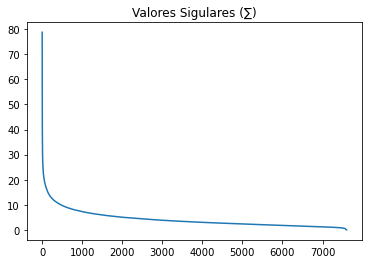

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S)

Pesebemos que tem um cotovelo proximo do 1000, vamos diminuir a escala para um valor menor que esse, para podemos analisar melhor.

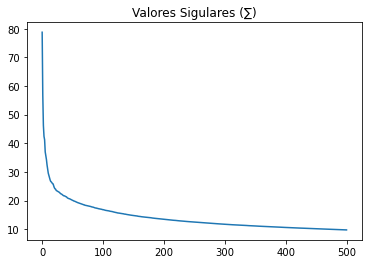

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S[:500])

Vamos redizir mais a onda de analiza, para tentar pegar melhor o fluxo de variação.

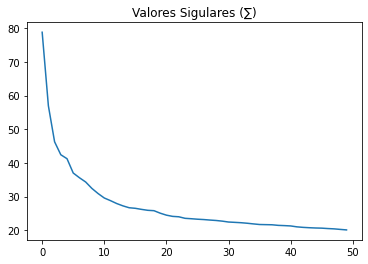

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S[:50])

Temos um maior fluxo próximo ao 10, então iremos analisá-lo

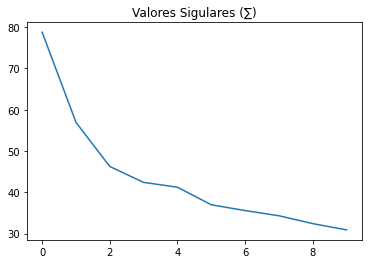

In [ ]:
plt.title("Valores Sigulares (∑)")
plt.plot(S[:10])

Como é possível perceber no gráfico anterior, o inicio do cotovelo é nas redondeza do 5. Vamos guadar esse valor que será util para a continuação da nossa analise. Esse valor será usado na delimitação das nossas setenças que iremos apresentar a segui.

In [ ]:
show_topics(V_T[:10], 5, vocab)

['gt lt reuters fullquote new',
 'gt lt font fullquote http',
 'ap gt lt quot font',
 'new quot microsoft gt lt',
 'new ap york stocks fullquote',
 'said oil iraq gt lt',
 'oil prices quot crude record',
 'new reuters iraq president bush',
 'said oil new stocks ap',
 'microsoft reuters iraq software search']

Agora que encontamos um conjunto topicalizado, iremos partir para a analise dos dados por NMF.

Primeiro vamos pegar o número de linhas e de colunas da nossa matriz de entrada, além de definimos o número de tópicos.

In [ ]:
m, n = vectors.shape
num_top = 6 # o número que encontramos no svd mais 1

Agora vamos calcular a NMF usando a sua respectiva função, além fatorá-la na matriz de recursos e a matriz dos coeficientes.

In [ ]:
m_nmf = NMF(n_components=num_top, random_state=1)

W = m_nmf.fit_transform(np.asarray(vectors))
H = m_nmf.components_

C:\Users\aliss\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Vamos apresentar os tópicos.

In [ ]:
show_topics(H, 6, vocab)

['gt lt fullquote http font com',
 'reuters fullquote stocks target ticker investor',
 'ap game monday bush season president',
 'new york oil google search microsoft',
 'said afp iraq year company world',
 'quot microsoft game says deal president']

Iremos fazer a normalização da contagem por meio do TF-IDF, na qual leva em consideração a frequência com que os termos aparecem no documento. Para isso vamos calcular novamento o NMF, para termos a NMF pura e a normalizada.

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(texto)

In [ ]:
W1 = m_nmf.fit_transform(vectors_tfidf)
H1 = m_nmf.components_

C:\Users\aliss\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Iremos apresentar os tópicos para mostrar que temos uma semelhança entre a nmf normalizada e a não normalizada, e com a finalidade de provar que estamos ainda tratando o mesmo conjunto de dado.

In [ ]:
show_topics(H1, 6, vocab)

['iraq said reuters baghdad killed afp',
 'gt lt fullquote reuters http href',
 'oil prices stocks reuters crude record',
 'microsoft new company software corp google',
 'ap game season win team sox',
 'quot says game nuclear said deal']

Iremos plotar o nosso gráfico de normalização IF-IDF, para uma melhor visualização da distribuição do conjunto.

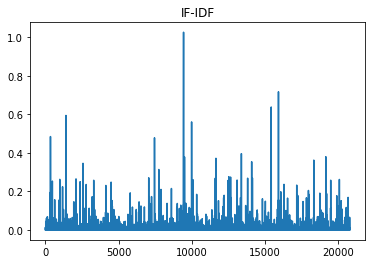

In [ ]:
plt.title("IF-IDF")
plt.plot(m_nmf.components_[0])

Para finalizar, iremos apresentar o erro aceitavel para essa normalização.

In [ ]:
m_nmf.reconstruction_err_

86.12967474083398

Bem, finalizamos a nossa analise, vale salientar que foram simples demonstrções da utilização do SVD e NMF para a realização da modelagem de dados. Porém, com essas demostração podemos obsevar que com o mesmo processo conseguimos analisar datasets diferentes e que consigamos extrair informações topográfica da modela. Dessa forma, demonstrando assim a super utilidade desses métodos em conjuntos que envolvam classificação de tópicos.